We perform simulation on $[0,1]$ with a non-constant baseline.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tick.plot import plot_timefunction
from tick.base import TimeFunction

In [3]:
period_length = 1

In [4]:
mu_0 = 8
mu_1 = 100
delta = 0.5
y_1 = mu_0 + mu_1*(1-delta)

In [5]:
T = np.array([0, delta , 1], dtype=float)
Y = np.array([mu_0, mu_0, y_1], dtype=float)

tf = TimeFunction((T, Y))

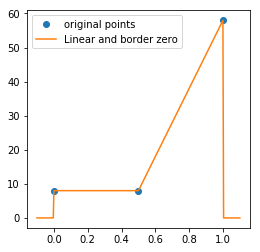

In [7]:
plot_timefunction(tf)
plt.show()

We suggest that the baseline $\mu (t)$ is piecewise affine.

In [6]:
Yc = np.array([mu_0, mu_0, y_1/2 ], dtype=float)

tfc = TimeFunction((T, Yc), inter_mode = TimeFunction.InterConstLeft)

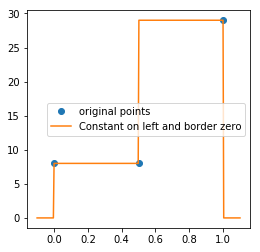

In [8]:
plot_timefunction(tfc)
plt.show()

We can also consider piecewise constant baselines $\mu (t)$.

In [7]:
from tick.hawkes import SimuHawkesExpKernels
from tick.plot import plot_point_process

In [9]:
decay = 1
adjacency = np.array([[3.0]])
baseline = [tf]

In [10]:
hawkes = SimuHawkesExpKernels(adjacency, decay, baseline=baseline, end_time=period_length,
                              seed=2093, verbose=True, force_simulation=True)
hawkes.track_intensity(0.01)
hawkes.simulate()

--------------------------------------------------
Launching simulation using SimuHawkesExpKernels...
Done simulating using SimuHawkesExpKernels in 1.23e-03 seconds.


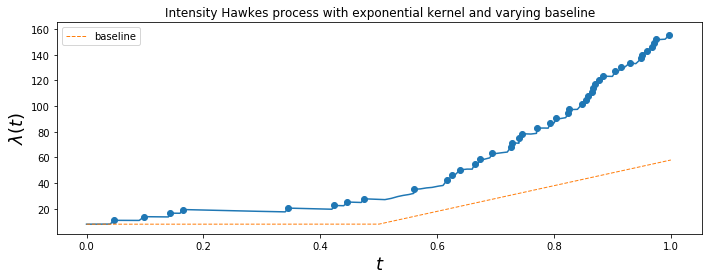

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

plot_point_process(hawkes, ax=ax)

t_values = np.linspace(0, hawkes.end_time, 1000)
ax.plot(t_values, hawkes.get_baseline_values(0, t_values), label='baseline',
        ls='--', lw=1)
ax.set_ylabel("$\lambda(t)$", fontsize=18)
ax.legend()

plt.title("Intensity Hawkes process with exponential kernel and varying "
          "baseline")
fig.tight_layout()
plt.show()

In [13]:
time_vec= hawkes.timestamps
time_vec[0]

array([0.04767863, 0.09833298, 0.14304921, 0.16452368, 0.34506892,
       0.42407901, 0.44648479, 0.47456328, 0.56006324, 0.61734994,
       0.62470937, 0.63914379, 0.66443071, 0.67276581, 0.69457864,
       0.72647116, 0.72816059, 0.74093238, 0.74600134, 0.77159141,
       0.79397216, 0.80388231, 0.82442694, 0.82549572, 0.84768034,
       0.85424581, 0.85855906, 0.86483855, 0.86691267, 0.87006288,
       0.87736605, 0.88352099, 0.90509885, 0.91427918, 0.9297097 ,
       0.94921875, 0.95075716, 0.95847936, 0.96853787, 0.971914  ,
       0.97435823, 0.99737579])

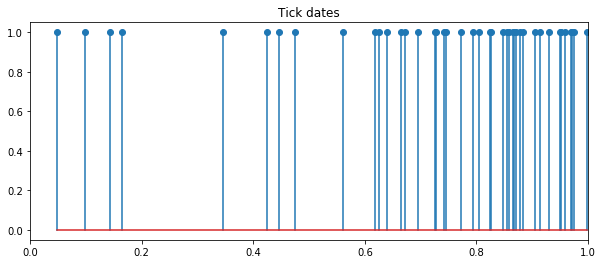

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.set_xlim(0, 1)
plt.stem(time_vec[0], np.ones(len(time_vec[0])))
plt.title('Tick dates')
plt.show()

Same with power law kernel

In [11]:
from tick.hawkes import SimuHawkes, HawkesKernelPowerLaw

In [12]:
multiplier = 0.002
cutoff = 0.008
exponent = 1.5

support = 1

hawkes_p = SimuHawkes(
    kernels=[[HawkesKernelPowerLaw(multiplier, cutoff, exponent, support)]],
    baseline=baseline, seed=382, verbose=True , force_simulation = True )
hawkes_p.end_time =1
hawkes_p.simulate()

----------------------------------------
Launching simulation using SimuHawkes...
Done simulating using SimuHawkes in 1.09e-02 seconds.


Now, we simulate $n$ samples over $[0,1]$. 

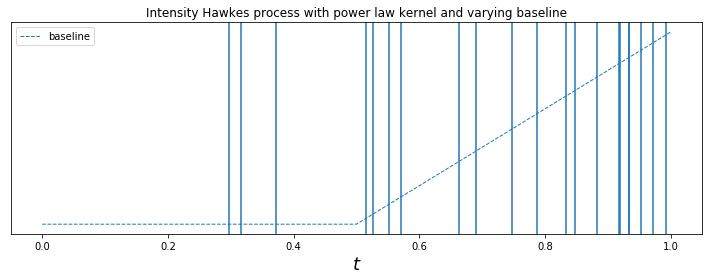

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

plot_point_process(hawkes_p, ax=ax)

t_values = np.linspace(0, hawkes_p.end_time, 1000)
ax.plot(t_values, hawkes_p.get_baseline_values(0, t_values), label='baseline',
        ls='--', lw=1)
ax.set_ylabel("$\lambda(t)$", fontsize=18)
ax.legend()

plt.title("Intensity Hawkes process with power law kernel and varying "
          "baseline")
fig.tight_layout()
plt.show()

Moment method for the estimation of the baseline

In [13]:
N_simul = 100
np.random.seed(seed=489)

In [14]:
timestamps_N = np.array([])

In [15]:
timestamps_list = []

In [16]:
for i in range(N_simul) :
    hawkes_i = SimuHawkesExpKernels(adjacency, decay, baseline=baseline, end_time=period_length, verbose=False, force_simulation=True)
    hawkes_i.track_intensity(0.01)
    hawkes_i.simulate()
    timestamps_N =np.concatenate((timestamps_N, hawkes_i.timestamps[0]))
    timestamps_list.append(hawkes_i.timestamps[0])
timestamps_N.sort()

In [23]:
timestamps_list

[array([0.01309854, 0.03847096, 0.08351572, 0.13923806, 0.17355647,
        0.26199387, 0.27692573, 0.30059652, 0.36425704, 0.37944247,
        0.38247793, 0.39672756, 0.40959535, 0.41002696, 0.4123609 ,
        0.4151751 , 0.42112885, 0.43107788, 0.44572298, 0.44781974,
        0.45183411, 0.45766154, 0.49480362, 0.49787136, 0.55674557,
        0.56866853, 0.60090222, 0.60910945, 0.65180974, 0.66830032,
        0.6764379 , 0.67941692, 0.70354657, 0.71027802, 0.71169294,
        0.71460465, 0.71818317, 0.72787455, 0.7347815 , 0.75663951,
        0.76502419, 0.78372572, 0.78498072, 0.80141676, 0.81123982,
        0.81963783, 0.81984819, 0.83214789, 0.83263126, 0.84431741,
        0.87001423, 0.87216319, 0.87771015, 0.88759766, 0.88843987,
        0.90166425, 0.9033685 , 0.91090843, 0.91752258, 0.91787077,
        0.9260518 , 0.92670129, 0.93164339, 0.94707494, 0.947989  ,
        0.95409349, 0.95654013, 0.96176074, 0.96788671, 0.97763565,
        0.98237899, 0.98402756, 0.98499014, 0.98

In [17]:
q = 100 # number of bins

In [18]:
discretized = np.zeros(q)

In [19]:
len(timestamps_N)

5203

In [20]:
for i in range(q):
    discretized[i] = len(np.where( timestamps_N <((i+1)/q))[0])

In [ ]:
discretized

In [21]:
bigN =discretized /N_simul

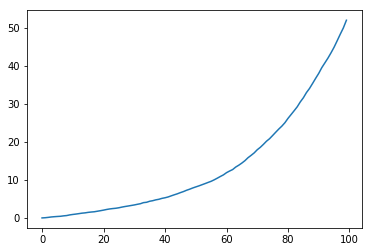

In [22]:
plt.plot(bigN)
plt.show()

Comparison with a constant baseline

In [24]:
hawkes_c = SimuHawkesExpKernels(adjacency, decay, baseline=[mu_0], end_time=period_length,
                              seed=2093, verbose=True, force_simulation=True)
hawkes_c.track_intensity(0.01)
hawkes_c.simulate()

--------------------------------------------------
Launching simulation using SimuHawkesExpKernels...
Done simulating using SimuHawkesExpKernels in 7.78e-03 seconds.


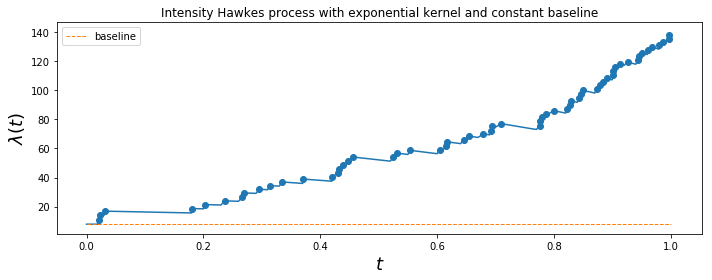

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

plot_point_process(hawkes_c, ax=ax)

t_values = np.linspace(0, hawkes_c.end_time, 1000)
ax.plot(t_values, hawkes_c.get_baseline_values(0, t_values), label='baseline',
        ls='--', lw=1)
ax.set_ylabel("$\lambda(t)$", fontsize=18)
ax.legend()

plt.title("Intensity Hawkes process with exponential kernel and constant "
          "baseline")
fig.tight_layout()
plt.show()

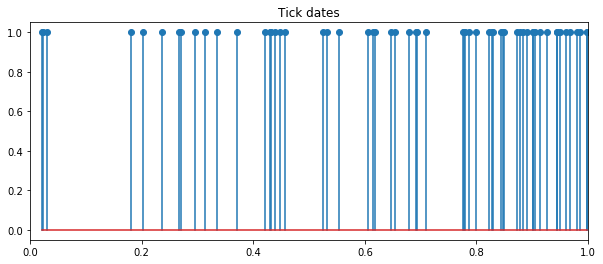

In [26]:
time_vec_c= hawkes_c.timestamps

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.set_xlim(0, 1)
plt.stem(time_vec_c[0], np.ones(len(time_vec_c[0])))
plt.title('Tick dates')
plt.show()

In [17]:
timestamps_N_c = np.array([])
timestamps_list_c = []
np.random.seed(seed=1789)
for i in range(N_simul) :
    hawkes_i = SimuHawkesExpKernels(adjacency, decay, baseline=[mu_0], end_time=period_length, verbose=False, force_simulation=True)
    hawkes_i.track_intensity(0.01)
    hawkes_i.simulate()
    timestamps_N_c =np.concatenate((timestamps_N_c, hawkes_i.timestamps[0]))
    timestamps_list_c.append(hawkes_i.timestamps[0])
timestamps_N_c.sort()

In [24]:
discretized_0 = np.zeros(q)
for i in range(q):
    discretized_0[i] = len(np.where( timestamps_N_c <((i+1)/q))[0])


In [25]:
bigN_0 = discretized_0 /N_simul

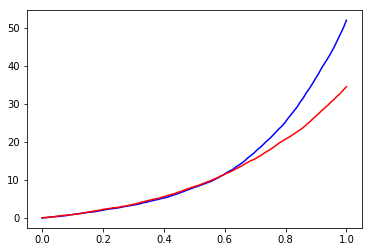

In [26]:
plt.plot(np.linspace(0,1,q),bigN,"b")
plt.plot(np.linspace(0,1,q), bigN_0, "r")
plt.show()

In blue : the estimator of $e(t) = m(t) + \psi \star m (t)$ with non constant baseline 

In red : the estimator of $e(t)$ with constant baseline

Comparison with a piecewise constant baseline

In [31]:
hawkes_b = SimuHawkesExpKernels(adjacency, decay, baseline=[tfc], end_time=period_length,
                              seed=2093, verbose=True, force_simulation=True)
hawkes_b.track_intensity(0.01)
hawkes_b.simulate()

--------------------------------------------------
Launching simulation using SimuHawkesExpKernels...
Done simulating using SimuHawkesExpKernels in 7.67e-03 seconds.


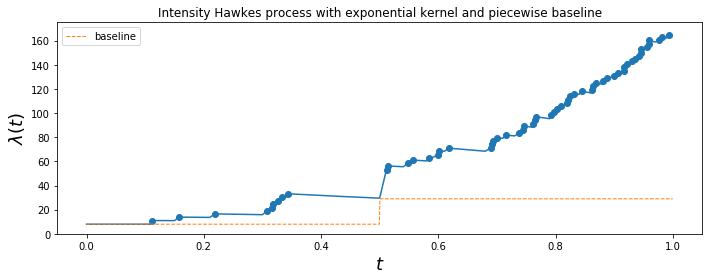

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

plot_point_process(hawkes_b, ax=ax)

t_values = np.linspace(0, hawkes_b.end_time, 1000)
ax.plot(t_values, hawkes_b.get_baseline_values(0, t_values), label='baseline',
        ls='--', lw=1)
ax.set_ylabel("$\lambda(t)$", fontsize=18)
ax.legend()

plt.title("Intensity Hawkes process with exponential kernel and piecewise baseline")
fig.tight_layout()
plt.show()

In [33]:
time_vec_b= hawkes_b.timestamps
time_vec_b[0]

array([0.11179817, 0.15709937, 0.21884464, 0.30721766, 0.3161846 ,
       0.31870021, 0.32610661, 0.3338035 , 0.34289522, 0.51217249,
       0.51497089, 0.54821711, 0.55673924, 0.58448075, 0.59901505,
       0.60099067, 0.61806877, 0.68960842, 0.69105093, 0.69323725,
       0.70052532, 0.71468215, 0.73820014, 0.74378701, 0.74654793,
       0.76093972, 0.76443127, 0.76682533, 0.79144323, 0.79661408,
       0.8022061 , 0.80901061, 0.81928266, 0.82048905, 0.82395335,
       0.83199301, 0.84512697, 0.86305098, 0.86424525, 0.86971871,
       0.88056734, 0.88719508, 0.89954085, 0.9058271 , 0.91701001,
       0.91701352, 0.92222064, 0.9297835 , 0.93560404, 0.94181921,
       0.94521794, 0.94640825, 0.95548408, 0.95912378, 0.95986698,
       0.97732412, 0.98097306, 0.99320285])

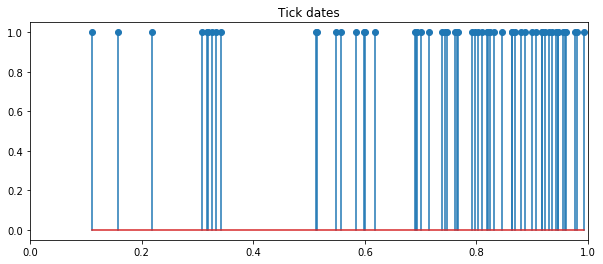

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.set_xlim(0, 1)
plt.stem(time_vec_b[0], np.ones(len(time_vec_b[0])))
plt.title('Tick dates')
plt.show()

In [18]:
timestamps_N_b = np.array([])
timestamps_list_b = []
np.random.seed(seed=588)
for i in range(N_simul) :
    hawkes_i = SimuHawkesExpKernels(adjacency, decay, baseline=[tfc], end_time=period_length, verbose=False, force_simulation=True)
    hawkes_i.track_intensity(0.01)
    hawkes_i.simulate()
    timestamps_N_b =np.concatenate((timestamps_N_b, hawkes_i.timestamps[0]))
    timestamps_list_b.append(hawkes_i.timestamps[0])
timestamps_N_b.sort()

In [28]:
discretized_b = np.zeros(q)
for i in range(q):
    discretized_b[i] = len(np.where( timestamps_N_b <((i+1)/q))[0])

In [29]:
bigN_b = discretized_b /N_simul

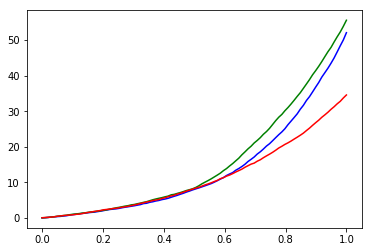

In [30]:
plt.plot(np.linspace(0,1,q),bigN,"b")
plt.plot(np.linspace(0,1,q),bigN_b,"g")
plt.plot(np.linspace(0,1,q), bigN_0, "r")
plt.show()

We observe that the piecewise affine behaviour and the abrupt change point do not give significantly different expectation curves.

In [19]:
import pandas as pd

In [32]:
test = pd.DataFrame({"piecewise_affine" : bigN, "constant" : bigN_0 , "abrupt" : bigN_b})

In [ ]:
test

In [33]:
test.to_csv(path_or_buf="simulations_baseline.csv")

In [34]:
dates_all_piecewise = pd.DataFrame({"piecewise":timestamps_N})

In [35]:
dates_all_constant = pd.DataFrame({"constant":timestamps_N_c})

In [36]:
dates_all_abrupt = pd.DataFrame({"abrupt":timestamps_N_b})

In [37]:
dates_Nsimul = pd.DataFrame({"Nsimul": [N_simul]})

In [38]:
dates_all_piecewise.to_csv(path_or_buf="piecewise.csv")

In [39]:
dates_all_constant.to_csv(path_or_buf="constant.csv")

In [40]:
dates_all_abrupt.to_csv(path_or_buf="abrupt.csv")

In [41]:
dates_Nsimul.to_csv(path_or_buf="nsimul.csv")

In [42]:
dates_Nsimul

,Nsimul
0,100


In [19]:
import EM

In [43]:
ticksEM= EM.EM(kernel_support = 0.5)

In [44]:
ticksEM.fit(timestamps_list_c)





  0%|          | 0/101 [00:00<?, ?it/s]



  1%|          | 1/101 [00:01<01:55,  1.15s/it]



  2%|▏         | 2/101 [00:02<02:06,  1.28s/it]



  3%|▎         | 3/101 [00:04<02:18,  1.42s/it]



  4%|▍         | 4/101 [00:06<02:26,  1.51s/it]



  5%|▍         | 5/101 [00:08<02:39,  1.66s/it]



  6%|▌         | 6/101 [00:10<02:41,  1.70s/it]



  7%|▋         | 7/101 [00:11<02:31,  1.61s/it]



  8%|▊         | 8/101 [00:12<02:26,  1.58s/it]



  9%|▉         | 9/101 [00:13<02:19,  1.52s/it]



 10%|▉         | 10/101 [00:14<02:12,  1.46s/it]



 11%|█         | 11/101 [00:15<02:10,  1.45s/it]



 12%|█▏        | 12/101 [00:16<02:04,  1.40s/it]



 13%|█▎        | 13/101 [00:17<01:59,  1.36s/it]



 14%|█▍        | 14/101 [00:19<01:58,  1.36s/it]

In [45]:
ticksEM.kernel

array([2.37120371, 2.18480442, 1.72567563, 1.54236191, 1.07717884,
       0.92048023, 0.74223279, 0.60716975, 0.37587188, 0.31623259])

In [46]:
ticksEM.baseline

array([ 9.24400784,  8.62675725,  9.04922315,  9.66442202, 10.03939218,
       10.9310113 , 10.24380672, 11.84663944, 10.72682212, 11.67068065])